In [ ]:
import os
import pandas as pd
from collections import defaultdict
import random
import networkx as nx  # For walk/path utilities

CLEANED_DIR = "Assignment 2/Cleaned Connections"

In [3]:
# key = student full name, value = list of connected names
adjacency_dict = defaultdict(list)

# Helper: get cleaned filename to student name
def extract_student_name(file):
    return file.split(' - ')[-1].replace('.csv', '').replace(' ', '_').title()

In [4]:
for file in os.listdir(CLEANED_DIR):
    if not file.endswith(".csv"):
        continue

    file_path = os.path.join(CLEANED_DIR, file)
    df = pd.read_csv(file_path)

    student_name = extract_student_name(file)

    # Create student node
    if student_name not in adjacency_dict:
        adjacency_dict[student_name] = []

    for _, row in df.iterrows():
        connection = row["Full Name"]
        if not isinstance(connection, str):
            continue

        # Add edge: student <-> connection
        adjacency_dict[student_name].append(connection)

        if connection not in adjacency_dict:
            adjacency_dict[connection] = []
        adjacency_dict[connection].append(student_name)

In [ ]:
degree_dict = {node: len(set(neighbors)) for node, neighbors in adjacency_dict.items()}

sorted_degree_dict = dict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))

sorted_degree_dict

{'Rohit_Malviya': 4266,
 'Ravi_Rajput': 4076,
 'Manoj_Dewda': 3975,
 'Ramraj_Nagar': 3719,
 'Nirmal_Mewada': 3531,
 'Pranjal_Dubey': 3350,
 'Challa_Trivedh_Kumar': 2916,
 'Neeraj_Parmar': 2690,
 'Himanshu_Kumar': 2674,
 'Aman_Singh': 2657,
 'Byagari_Kumar': 2499,
 'Janu_Chaudhary': 2169,
 'Ujjval_Baijal': 2162,
 'Prabhat_Patidar': 2115,
 'Alok_Raj': 2003,
 'Chandan_Giri': 1933,
 'Rajiv_Kumar': 1920,
 'Shubham_Kumar': 1806,
 'Prem_Kumar': 1777,
 'Ayush_Kumar': 1700,
 'Aryan_Saini': 1604,
 'Ompal_Yadav': 1557,
 'Shivang_Dubey': 1530,
 'Shubham_Kang': 1472,
 'Shivam_Shukla': 1441,
 'Mayank_Raj': 1375,
 'Mohit_Sharma': 1269,
 'Manish_Kumar_Tiwari': 1242,
 'Vivek_Kumar': 1056,
 'Ishant_Bhoyar': 1023,
 'Gaurav_Rathore': 1010,
 'Ranjeet_Yadav': 919,
 'Anamika_Kumari': 883,
 'Monu_Rajpoot': 881,
 'Prachi_Dhakad': 874,
 'Ekta_Kumari': 826,
 'Mehtab_Alam': 808,
 'Bhaskar_Mahato': 789,
 'Vishal_Kumar': 769,
 'Priyadarshi_Kumar': 753,
 'Yuvraj_Chirag': 747,
 'Anand_Pandey': 739,
 'Anuradha_Tiwari'

In [9]:
G = nx.Graph()

# Add edges from adjacency_dict
for node, neighbors in adjacency_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)


In [10]:
def random_walk(graph, start, end, max_steps=100):
    path = [start]
    current = start
    for _ in range(max_steps):
        neighbors = list(graph.neighbors(current))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
        if next_node == end:
            break
        current = next_node
    return path


In [11]:
def prune_path(graph, walk_path):
    # Convert walk to subgraph and find shortest path between start and end
    start, end = walk_path[0], walk_path[-1]
    subgraph = graph.subgraph(walk_path)
    try:
        pruned = nx.shortest_path(subgraph, source=start, target=end)
        return pruned
    except nx.NetworkXNoPath:
        return None


In [12]:
random_walk_lengths = []
pruned_path_lengths = []

student_names = list(degree_dict.keys())
num_trials = 50  # Or 100 for more robust stats

for _ in range(num_trials):
    s1, s2 = random.sample(student_names, 2)
    walk = random_walk(G, s1, s2)
    pruned = prune_path(G, walk)

    random_walk_lengths.append(len(walk))
    if pruned:
        pruned_path_lengths.append(len(pruned))


In [13]:
import numpy as np

print("📊 Random Walk Lengths")
print(f"Average: {np.mean(random_walk_lengths):.2f}")
print(f"Max: {np.max(random_walk_lengths)}")
print(f"Min: {np.min(random_walk_lengths)}")

print("\n🔍 Pruned Path Lengths")
print(f"Average: {np.mean(pruned_path_lengths):.2f}")
print(f"Max: {np.max(pruned_path_lengths)}")
print(f"Min: {np.min(pruned_path_lengths)}")


📊 Random Walk Lengths
Average: 98.90
Max: 101
Min: 43

🔍 Pruned Path Lengths
Average: 3.42
Max: 4
Min: 2


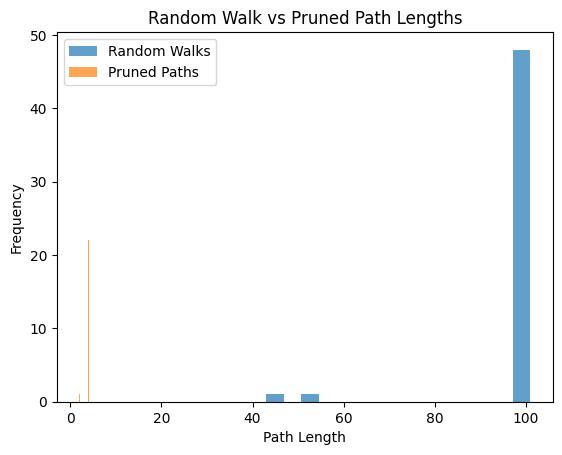

In [ ]:
import matplotlib.pyplot as plt

plt.hist(random_walk_lengths, bins=15, alpha=0.7, label="Random Walks")
plt.hist(pruned_path_lengths, bins=15, alpha=0.7, label="Pruned Paths")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.title("Random Walk vs Pruned Path Lengths")
plt.legend()
plt.show()

In [ ]:
adj_df = pd.DataFrame.from_dict(adjacency_dict, orient='index')
adj_df.to_csv("Assignment 2/final_adjacency_list.csv")